In [2]:
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape
((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))
X_train[0]

4422102/4422102 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
class_labels = ["Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_labels

['Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

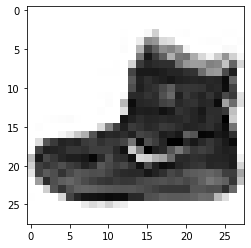

In [ ]:
plt.imshow(X_train[0], cmap="Greys")

Text(0.5, 1.0, 'Sandal / 4')

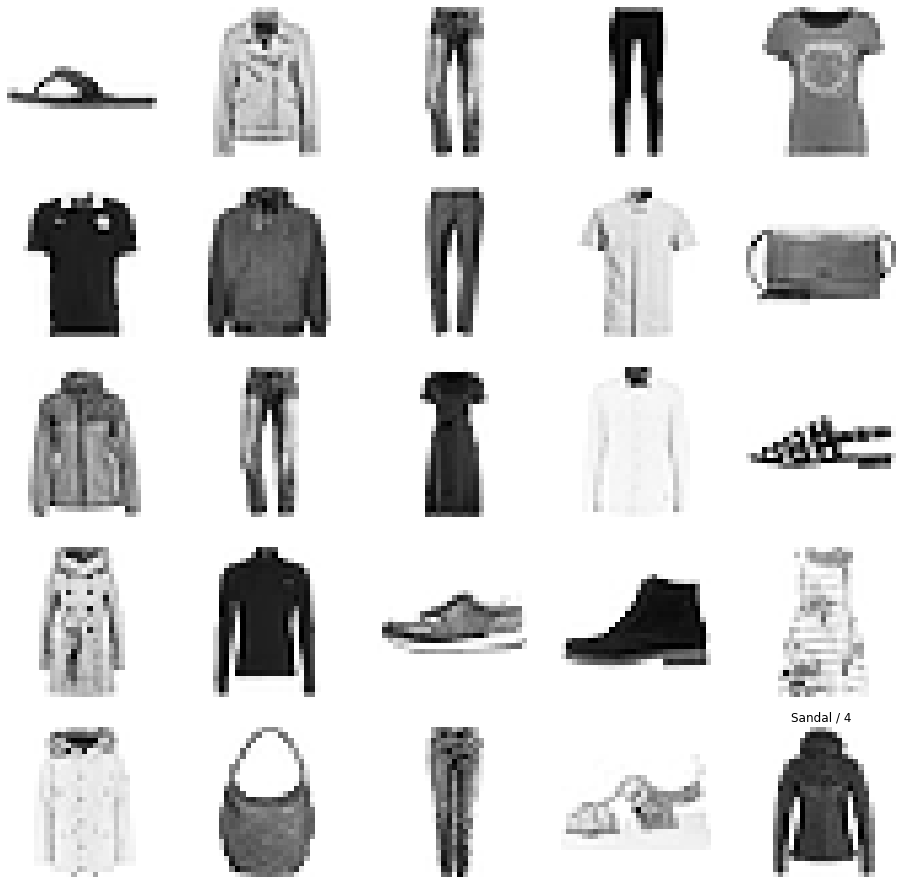

In [ ]:
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5, 5, j)
  j += 1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

In [ ]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
cnn = keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 21s 6ms/step - loss: 0.5578 - accuracy: 0.7901 - val_loss: 0.3674 - val_accuracy: 0.8644
Epoch 2/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3650 - accuracy: 0.8677 - val_loss: 0.3331 - val_accuracy: 0.8778
Epoch 3/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3176 - accuracy: 0.8829 - val_loss: 0.2932 - val_accuracy: 0.8903
Epoch 4/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2905 - accuracy: 0.8941 - val_loss: 0.2957 - val_accuracy: 0.8947
Epoch 5/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2678 - accuracy: 0.9018 - val_loss: 0.2888 - val_accuracy: 0.8961
Epoch 6/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2550 - accuracy: 0.9053 - val_loss: 0.2789 - val_accuracy: 0.8986
Epoch 7/20
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2399 - accuracy: 0.9111 - val_loss: 0.2747 - val_ac

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.9018


[0.3058987259864807, 0.9017999768257141]

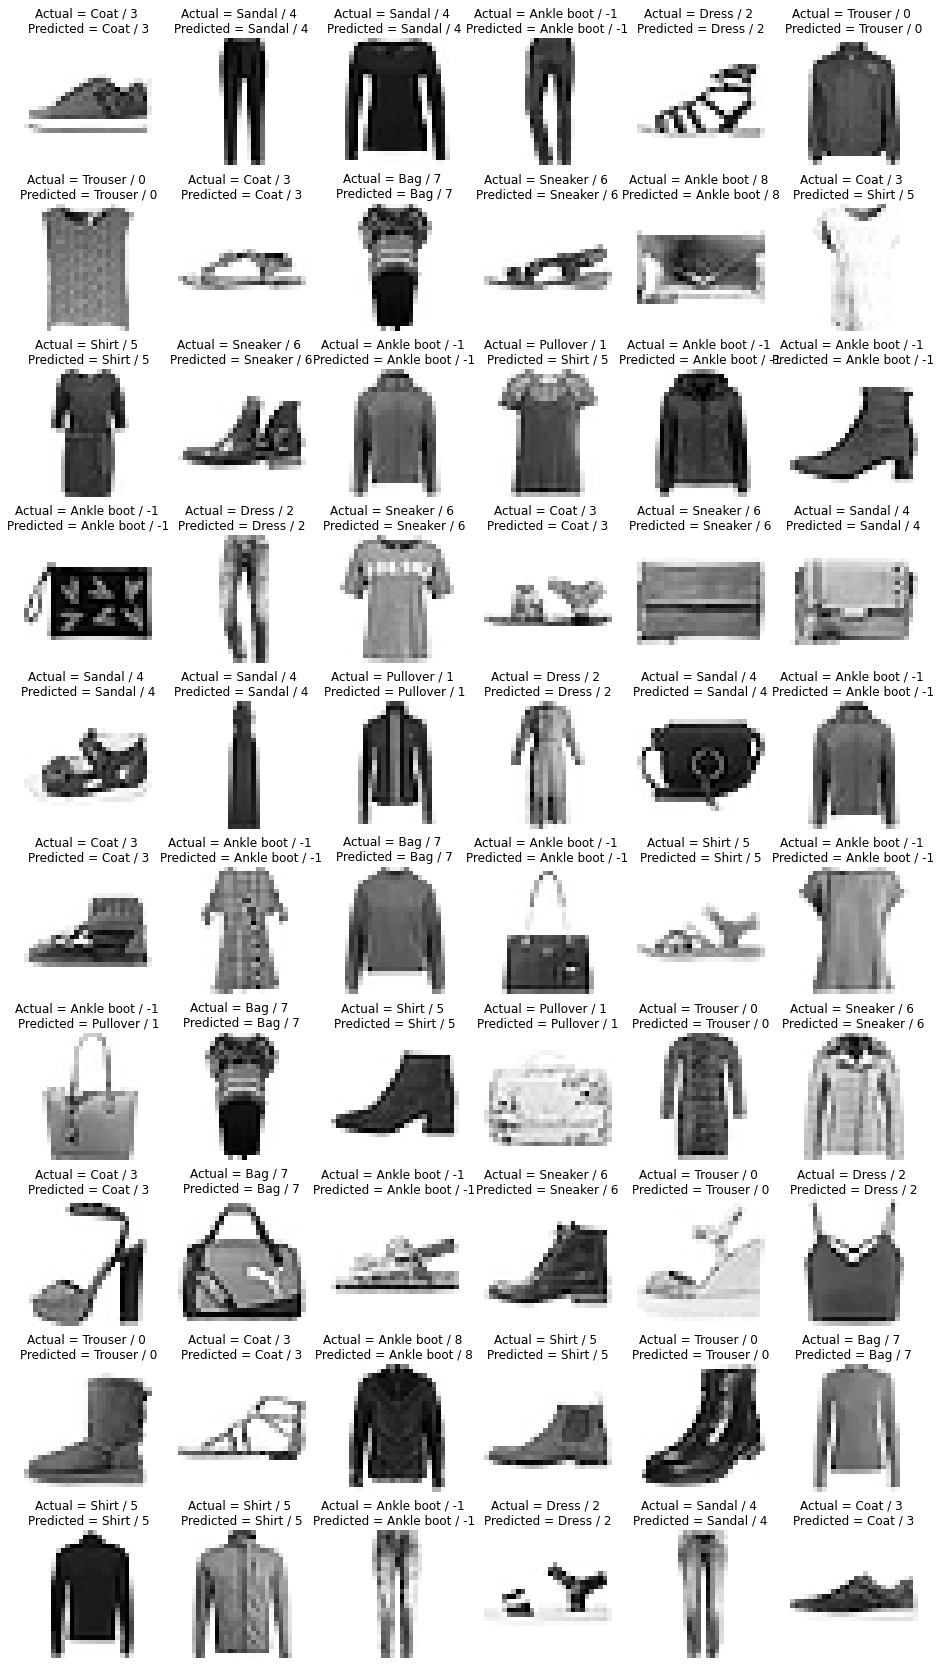

In [ ]:
plt.figure(figsize=(16, 30))
j = 1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10, 6, j)
  j += 1
  plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(
      class_labels[y_test[i]-1], y_test[i]-1, 
      class_labels[np.argmax(y_pred[i])-1], np.argmax(y_pred[i])-1))

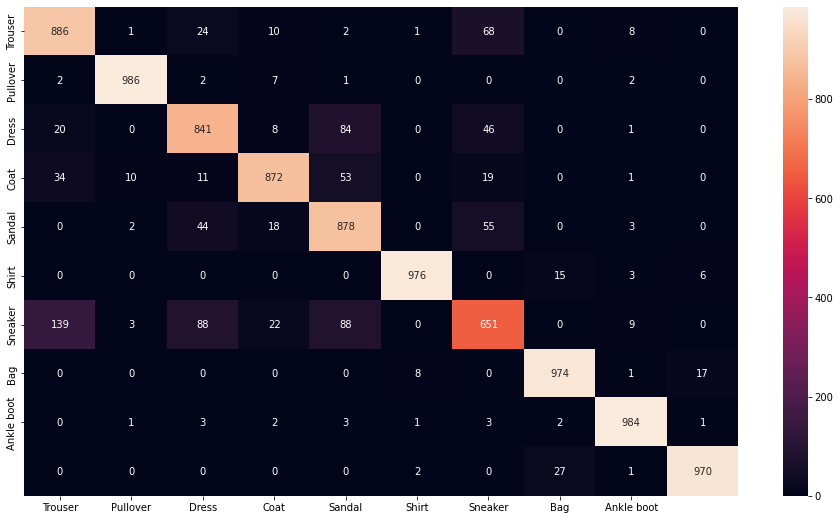

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16, 9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.83      0.84      0.84      1000
           3       0.93      0.87      0.90      1000
           4       0.79      0.88      0.83      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.65      0.71      1000
           7       0.96      0.97      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
cnn.save('fashion_mnist_cnn_model')